# Analysis Notebook - DPHPC Course
## Suffix Array Project
### Jan Adelmann, Gian Hiltbrunner and Raya Stoyanova
 Date: 14.01.21

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [16]:
from decimal import Decimal
import scipy
import numpy as np
from scipy import stats

## Time
#### Plots with Time (s) in the y-axis

In [17]:
data = pd.read_csv('benchmark.csv').drop('Unnamed: 0', axis = 1)

In [18]:
data['str_length'] = ['%.1E' % Decimal(x) for x in data['str_length']]

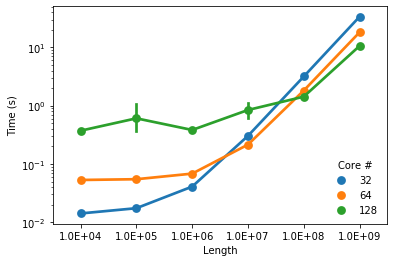

In [19]:
ax = sns.pointplot(data = data, x = 'str_length', y = 'time', hue='nr_cores')
ax.set(ylabel='Time (s)', xlabel='Length')
ax.set(yscale="log")
ax.legend(loc='lower right', frameon=False).set_title('Core #')

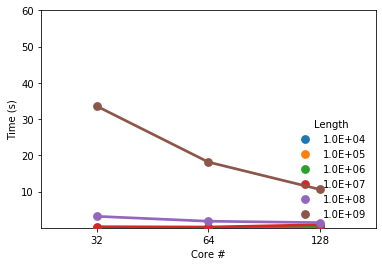

In [20]:
ax = sns.pointplot(data = data, x = 'nr_cores', hue = 'str_length', y='time')
ax.set(ylabel='Time (s)', xlabel='Core #', ylim=(0.001, 60))
#ax.set(yscale="log")
ax.legend(loc='lower right', frameon=False).set_title("Length")

In [21]:
repeats = pd.read_csv('30reps.csv')
repeats_merge = pd.read_csv('30reps_merge.csv')

In [22]:
#repeats['str_length'] =  [('10e' + str(e)) for e in repeats['str_length']]

In [23]:
for core in [32,64,128]:
    for str_len in range(5,10):
        df = list(repeats[repeats['nr_cores'] == core][repeats['str_length'] == str_len]['time'])
        print(str(core) + ' ' + str(str_len)  + ' ' + str(stats.shapiro(df)))

32 5 ShapiroResult(statistic=0.8250634670257568, pvalue=0.00019445946963969618)
32 6 ShapiroResult(statistic=0.9115992784500122, pvalue=0.016332102939486504)
32 7 ShapiroResult(statistic=0.5304251909255981, pvalue=1.1408503475252019e-08)
32 8 ShapiroResult(statistic=0.35379868745803833, pvalue=2.0608460771232018e-10)
32 9 ShapiroResult(statistic=0.8357961773872375, pvalue=0.0003170715644955635)
64 5 ShapiroResult(statistic=0.9800984859466553, pvalue=0.8281680345535278)
64 6 ShapiroResult(statistic=0.92643803358078, pvalue=0.039523646235466)
64 7 ShapiroResult(statistic=0.9119381308555603, pvalue=0.016658363863825798)
64 8 ShapiroResult(statistic=0.2306271195411682, pvalue=1.920422675050215e-11)
64 9 ShapiroResult(statistic=0.7112727761268616, pvalue=2.2858682768855942e-06)
128 5 ShapiroResult(statistic=0.6417596340179443, pvalue=2.4576652890573314e-07)
128 6 ShapiroResult(statistic=0.9800482392311096, pvalue=0.8268359899520874)
128 7 ShapiroResult(statistic=0.982305109500885, pvalue=0.

/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
for core in [32,64,128]:
    for str_len in range(5,8):
        df = list(repeats_merge[repeats_merge['nr_cores'] == core][repeats_merge['str_length'] == str_len]['time'])
        print(str(core) + ' ' + str(str_len)  + ' ' + str(stats.shapiro(df)))

32 5 ShapiroResult(statistic=0.8980555534362793, pvalue=0.007529939990490675)
32 6 ShapiroResult(statistic=0.42550718784332275, pvalue=9.499845354810077e-10)
32 7 ShapiroResult(statistic=0.432752788066864, pvalue=1.116429615422021e-09)
64 5 ShapiroResult(statistic=0.9644055962562561, pvalue=0.3992825150489807)
64 6 ShapiroResult(statistic=0.9856986999511719, pvalue=0.9484720230102539)
64 7 ShapiroResult(statistic=0.9654771089553833, pvalue=0.42386898398399353)
128 5 ShapiroResult(statistic=0.9634909629821777, pvalue=0.379167765378952)
128 6 ShapiroResult(statistic=0.9626843333244324, pvalue=0.36209970712661743)
128 7 ShapiroResult(statistic=0.4168339967727661, pvalue=7.844482285968013e-10)


/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


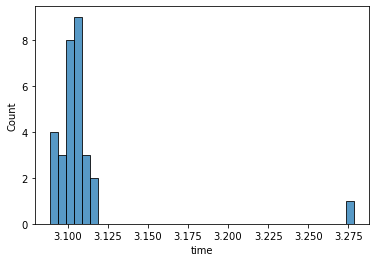

In [25]:
sns.histplot(repeats[repeats['nr_cores'] == 32][repeats['str_length'] == 8]['time'])

In [26]:
repeats

str_length  nr_cores  experiment   Overall       Min       Max      time
0             5        32           1  0.021963  0.021914  0.022044  0.021954
1             5        32           2  0.016168  0.016131  0.016192  0.016162
2             5        32           3  0.018177  0.018163  0.018235  0.018189
3             5        32           4  0.017212  0.017167  0.017216  0.017187
4             5        32           5  0.018324  0.018314  0.018377  0.018334
..          ...       ...         ...       ...       ...       ...       ...
445           9       128          26  9.334250  9.333790  9.334790  9.334250
446           9       128          27  9.318410  9.318250  9.318710  9.318430
447           9       128          28  9.267090  9.267090  9.267760  9.267500
448           9       128          29  9.293700  9.293210  9.293740  9.293430
449           9       128          30  9.429420  9.429220  9.429600  9.429390

[450 rows x 7 columns]

In [27]:
np.quantile(df[3], [0.01, 0.99])

array([1.93023, 1.93023])

In [28]:
np.median(df[3])

1.93023

In [29]:
df[3]

1.93023

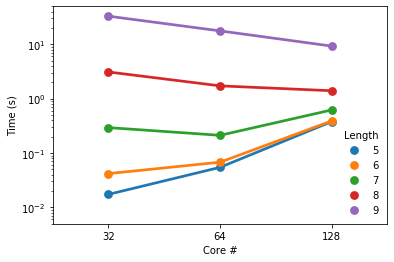

In [30]:
ax = sns.pointplot(data = repeats, x = 'nr_cores', hue = 'str_length', y='time', estimator=np.median)
ax.set(ylabel='Time (s)', xlabel='Core #', ylim=(0.005,50))


ax.legend(loc='lower right', frameon=False).set_title("Length")
ax.set(yscale="log")
plt.savefig('time_core_plot.pdf')

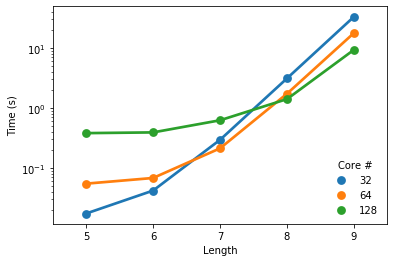

In [31]:
ax = sns.pointplot(data = repeats, x = 'str_length', y = 'time', hue='nr_cores',estimator=np.median)
ax.set(ylabel='Time (s)', xlabel='Length')

ax.set(yscale="log")

ax.legend(loc='lower right', frameon=False).set_title('Core #')
plt.savefig('time_length_plot.pdf')

## Memory Usage
#### Comparison of memory usage across algorithms 

In [32]:
mem = pd.read_csv('memory_merge.txt')

In [33]:
mem = mem[mem['NAME'] != 'SCATTER']
mem = mem[mem['NAME'] != 'PROBE ALL TO ALL']
mem = mem[mem['NAME'] != 'SCATTER TRIPLES']

In [34]:
mem['TOTAL'] = mem['SHARED'] + mem['PRIVATE']

In [35]:
memm = pd.read_csv('memory_sample.txt')
memm['TOTAL'] = memm['SHARED'] + memm['PRIVATE']

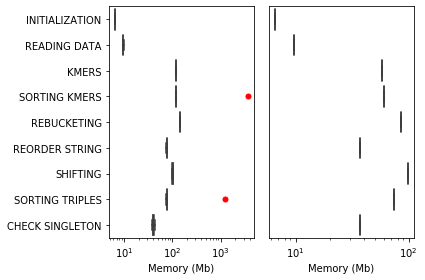

In [36]:
plt.figure()

# sp1
plt.subplot(121) 
ax1 = sns.boxplot(x="TOTAL", y="NAME", data=mem, flierprops=dict(marker='o', markersize=5, markerfacecolor = 'red', markeredgecolor = 'red'), whis = 6)
ax1.set(ylabel='', xlabel='Memory (Mb)')
ax1.set(xscale="log")

# sp2
plt.subplot(122)
ax2 = sns.boxplot(x="TOTAL", y="NAME", data=memm, flierprops=dict(marker='o', markersize=5, markerfacecolor = 'red', markeredgecolor = 'red'), whis = 6)
ax2.set(ylabel='', xlabel='Memory (Mb)')
ax2.set_yticks([])
ax2.set(xscale="log")

plt.tight_layout()
plt.savefig('memory_plot.pdf')  

## Linear Bound
#### Comparison of our implementation to the optimal linear bound

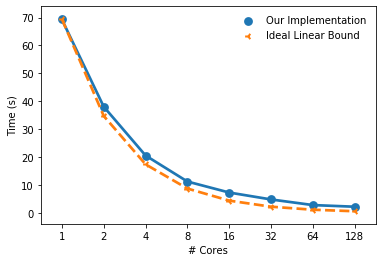

In [37]:
ls = pd.read_csv('linearspeedup.csv')

ls = pd.DataFrame([ls['nr_cores'], ls['time']]).T

ls['type'] = 'Our Implementation'

optimal = [69.43310/(2**i) for i in range(0,8)]

optimal_cores = [i for i in [1,2,4,8,16,32,64,128]]

ass = pd.DataFrame([optimal_cores,optimal]).T
ass['type'] = 'Ideal Linear Bound'

ass.columns = ls.columns

df = ls.append(ass, ignore_index=True)
df['nr_cores'] = df['nr_cores'].astype(int)

pt = sns.pointplot(data = df, x = 'nr_cores', y = 'time', hue = 'type', markers=['o','3'])
pt.set(ylabel='Time (s)', xlabel='# Cores')
pt.lines[9].set_linestyle("--")
pt.legend(loc='upper right', frameon=False)
plt.savefig('speedup_plot.pdf') 

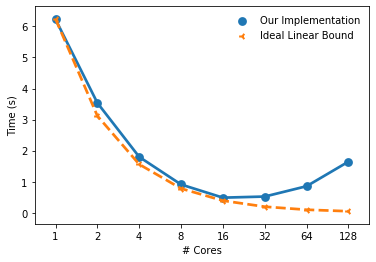

In [38]:
ls = pd.read_csv('linearspeedup_7.csv')

ls = pd.DataFrame([ls['nr_cores'], ls['time']]).T

ls['type'] = 'Our Implementation'

optimal = [6.241430/(2**i) for i in range(0,8)]

optimal_cores = [i for i in [1,2,4,8,16,32,64,128]]

ass = pd.DataFrame([optimal_cores,optimal]).T
ass['type'] = 'Ideal Linear Bound'

ass.columns = ls.columns

dff = ls.append(ass, ignore_index=True)
dff['nr_cores'] = dff['nr_cores'].astype(int)

pt = sns.pointplot(data = dff, x = 'nr_cores', y = 'time', hue = 'type', markers=['o','3'])
pt.set(ylabel='Time (s)', xlabel='# Cores')
pt.lines[9].set_linestyle("--")
pt.legend(loc='upper right', frameon=False)
plt.savefig('speedup_plot.pdf') 

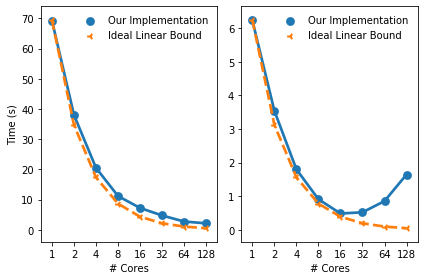

In [39]:
plt.subplot(121) 
pt = sns.pointplot(data = df, x = 'nr_cores', y = 'time', hue = 'type', markers=['o','3'],estimator=np.median)
pt.set(ylabel='Time (s)', xlabel='# Cores')
pt.lines[9].set_linestyle("--")
pt.legend(loc='upper right', frameon=False)

# sp2
plt.subplot(122)
pt = sns.pointplot(data = dff, x = 'nr_cores', y = 'time', hue = 'type', markers=['o','3'],estimator=np.median)
pt.set(ylabel='', xlabel='# Cores')
pt.lines[9].set_linestyle("--")
pt.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.savefig('linear_bound.pdf') 

In [40]:
df = pd.read_csv('2g_benchmark.csv', header=None)

In [41]:
r = np.quantile(df.iloc[:,3], [0.25, 0.75])

In [42]:
core = 64
str_len = 7  
x = repeats[repeats['nr_cores'] == core][repeats['str_length'] == str_len]['time']
y = repeats_merge[repeats_merge['nr_cores'] == core][repeats_merge['str_length'] == str_len]['time']

scipy.stats.kruskal(x,y)

/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)

In [43]:
scipy.stats.f_oneway(x,y)

F_onewayResult(statistic=1552352.290123067, pvalue=4.155133516129269e-130)

In [44]:
for core in [32,64,128]:
    for leng in range(5,9):
        x = repeats[repeats['str_length'] == leng][repeats['nr_cores'] == core]['time']
        y = repeats_merge[repeats['str_length'] == leng][repeats['nr_cores'] == core]['time']
        print(core,leng,scipy.stats.kruskal(x,y))

32 5 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
32 6 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
32 7 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
32 8 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
64 5 KruskalResult(statistic=40.415300546448094, pvalue=2.0532682990164597e-10)
64 6 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
64 7 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
64 8 KruskalResult(statistic=44.264754918306096, pvalue=2.868342524433262e-11)
128 5 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
128 6 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
128 7 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)
128 8 KruskalResult(statistic=44.26229508196721, pvalue=2.8719490663203305e-11)


/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## Merge Sort
#### Performance analysis of the merge sort 

In [45]:
repeats = repeats[['str_length','nr_cores','experiment','time']]
repeats['type'] = 'Samplesort'
repeats_merge['type'] = 'Mergesort'
repeats_comb = repeats.append(repeats_merge)
repeats_comb['str_length'] =  [('10e' + str(e)) for e in repeats_comb['str_length']]

/Users/gianhiltbrunner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
div_runtimes = [e * 1e-6 for e in [6889,72994,770755,12548235]]

In [47]:
header = ['str_length','nr_cores','experiment','time', 'type']
divdf = pd.DataFrame([['10e5',128,1,div_runtimes[0], 'divsufsort'], ['10e6',128,1,div_runtimes[1], 'divsufsort'], ['10e7',128,1,div_runtimes[2], 'divsufsort'], ['10e8',128,1,div_runtimes[3], 'divsufsort']], columns=header)

In [48]:
repeats_comb = repeats_comb.append(divdf)

In [49]:
repeats_comb = repeats_comb[repeats_comb['str_length'] != '10e9']
repeats_comb = repeats_comb[repeats_comb['nr_cores'] == 128]

In [50]:
divdf

str_length  nr_cores  experiment       time        type
0       10e5       128           1   0.006889  divsufsort
1       10e6       128           1   0.072994  divsufsort
2       10e7       128           1   0.770755  divsufsort
3       10e8       128           1  12.548235  divsufsort

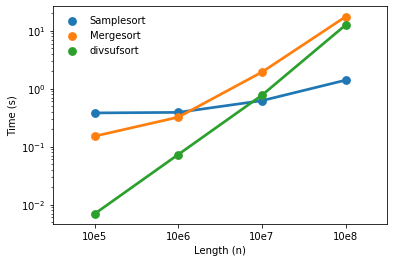

In [52]:
ax = sns.pointplot(data = repeats_comb, x = 'str_length', y = 'time', hue = 'type')
ax.set(yscale="log")
ax.set(ylabel='Time (s)', xlabel='Length (n)')
ax.legend(loc='upper left', frameon=False)
#ax.errorbar(x=repeats_comb['str_length'], y = repeats_comb['time'], yerr=repeats_comb.groupby("str_length").std()["time"].values)
plt.savefig('sample_merge.pdf')

In [53]:
df = pd.DataFrame({'Time': ['D=0', 'D=2', 'D=5', 'D=X'],
                   'Latency': [74.92, 75.32, 79.64, 100],
                   'Delay': [18.2, 80, 82, 84]})
latency_min_max = np.array([(73.3, 76), (73.3, 80), (75, 83.3), (100, 100)]).T
latency_err = np.abs(latency_min_max - df['Latency'].to_numpy())
delay_min_max = np.array([(0, 50), (50, 100), (68, 90), (75, 90)]).T
delay_err = np.abs(delay_min_max - df['Delay'].to_numpy())

In [54]:
repeats_comb.groupby("str_length").std()["time"].values

array([0.12004498, 0.050048  , 0.65814784, 8.04203561])

In [69]:
daf = pd.read_csv('human_30_rep.csv')

In [70]:
daf

nr_cores  experiment  Overall      Min      Max     time
0        128           1  181.135  181.135  181.135  181.135
1        128           2  179.986  179.986  179.987  179.986
2        128           3  179.587  179.587  179.587  179.587
3        128           4  180.602  180.594  180.603  180.602
4        128           5  179.992  179.992  179.992  179.992
5        128           6  180.110  180.106  180.110  180.106
6        128           7  182.429  182.429  182.430  182.429
7        128           8  180.209  180.209  180.209  180.209
8        128           9  182.206  182.206  182.206  182.206
9        128          10  180.329  180.329  180.329  180.329
10       128          11  182.673  182.673  182.674  182.673
11       128          12  183.612  183.612  183.613  183.612
12       128          13  182.367  182.367  182.367  182.367
13       128          14  184.775  184.774  184.775  184.775
14       128          15  184.606  184.606  184.606  184.606
15       128          16  183.276  183.275  183.276  183.276
16       128          17  182.838  182.838  182.839  182.838
17       128          18  182.350  182.349  182.350  182.350
18       128          19  182.587  182.586  182.587  182.587
19       128          20  183.136  183.136  183.136  183.136
20       128          21  183.969  183.968  183.969  183.968
21       128          22  185.493  185.493  185.494  185.493
22       128          23  184.065  184.064  184.065  184.064
23       128          24  183.459  183.459  183.460  183.459
24       128          25  185.046  185.046  185.047  185.047
25       128          26  182.139  182.139  182.140  182.139
26       128          27  182.734  182.733  182.735  182.734
27       128          28  182.706  182.705  182.706  182.706
28       128          29  184.034  184.034  184.034  184.034
29       128          30  184.989  184.989  184.990  184.989

In [71]:
scipy.stats.shapiro(daf['time'])

ShapiroResult(statistic=0.9467536807060242, pvalue=0.13830699026584625)

In [72]:
np.median(daf['time'])

182.6895

In [74]:
np.quantile(daf['time'], [0.01,0.99])

array([179.70271, 185.36366])

In [75]:
d = np.quantile(daf['time'], [0.25,0.75])
d[1]-d[0]

2.492999999999995